In [21]:
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
import cartopy.io.shapereader as shapereader
import matplotlib.ticker as ticker
import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm

import xarray as xr

In [22]:
df=pd.read_csv('folder/各点多年平均_有经纬LAI.csv')

In [23]:
df

,Unnamed: 0,H_F_MDS,type,name,valid,LE_F_MDS,P_F,TA_F,SW_OUT,P_SUM,VPD_F,LW_IN_F,SW_IN_F,albedo,b,latitude,longitude,longitude_new,IGBP,LAI
0,0,68.095032,MF_S,AR-SLu,0.801865,39.510745,0.020445,19.572791,NaN,23.146222,13.529252,318.662882,207.502198,NaN,2.084899,-33.464800,-66.459800,293.540200,MF,0.640604
1,0,-18.943289,ENF_S,AR-Vir,0.808693,82.198975,0.082782,21.431613,NaN,97.251417,9.126853,365.041162,161.715166,NaN,-0.235940,-28.239500,-56.188600,303.811400,ENF,2.414140
2,0,-3.286018,GRA,AT-Neu,0.809954,16.211796,0.042371,5.827517,56.022692,49.006782,2.215954,288.201762,81.199449,0.364724,-1.561054,47.116670,11.317500,11.317500,GRA,1.511286
3,0,57.910279,WSA_S,AU-Ade,0.759979,50.406914,0.082257,26.914328,56.529799,92.218069,15.135291,403.007267,217.090602,0.139399,1.507399,-13.076900,131.117800,131.117800,WSA,1.153943
4,0,80.377196,SAV_S,AU-ASM,0.733468,21.789513,0.022501,22.446910,63.676331,25.369881,20.150878,348.683547,239.376965,0.133624,10.096540,-22.283000,133.249000,133.249000,SAV,0.338191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,26.092398,ENF,US-Wi9,0.809565,24.793146,0.042611,3.592561,NaN,50.403250,2.624575,289.848535,114.845075,NaN,1.016907,46.738514,-91.074644,268.925356,ENF,1.752076
201,0,46.103491,GRA,US-Wkg,0.809871,15.500204,0.016670,17.012913,78.566354,19.093944,14.512146,301.841748,203.219174,0.190489,4.397425,31.736500,-109.941900,250.058100,GRA,0.294075
202,0,7.035685,WET,US-WPT,0.809934,43.061990,0.051723,10.735540,39.918884,60.106056,3.883991,343.312107,113.156470,0.173277,0.200350,41.464639,-82.996157,277.003843,WET,0.759704
203,0,41.667899,SAV_S,ZA-Kru,0.809954,31.513582,0.027485,21.452664,48.637975,33.633255,10.202385,374.528566,160.116744,0.150566,2.460642,-25.019700,31.496900,31.496900,SAV,1.000877


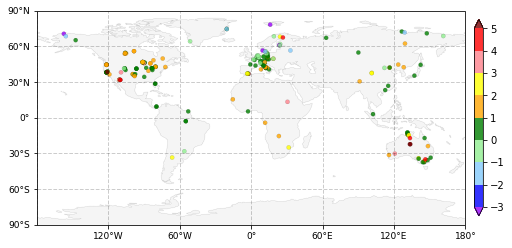

In [25]:
fig=plt.figure(figsize=(8, 4))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.LAND,color='whitesmoke',facecolor=0.95)
ax.coastlines(lw=0.05)

# 标注坐标轴
ax.set_xticks([-120,-60,0,60,120,180], crs=ccrs.PlateCarree())
ax.set_xticklabels([-120,-60,0,60,120,180],fontsize=9)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.set_yticklabels([-90, -60, -30, 0, 30, 60, 90],fontsize=9)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
#ax.grid()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.2, linestyle='--')



bounds = [-10,-3,-2,-1,0,1,2,3,4,5,25]
colors =['#9900fa','blue','#82cafc','lightgreen','green','orange','yellow','#fe828c','red','#770001']
cmap = ListedColormap(colors)
norms = BoundaryNorm(bounds, cmap.N)

point=plt.scatter(df['longitude'],df['latitude'],c=df['b'],s=18,alpha=0.8,cmap=cmap,norm=norms, vmin=-10, vmax=25,edgecolors='black', linewidths=0.1,transform=ccrs.PlateCarree())

cb1 = plt.colorbar(point, fraction=0.02, pad=0.02,boundaries= [-10]+[-3]+[-2]+[-1]+[0]+[1]+[2]+[3]+[4]+[5]+[25],extend='both',ticks=bounds,spacing='proportional',orientation='vertical')
cb1.update_ticks()


plt.savefig("folder/图/4.空间图.jpg",dpi=300)
plt.show()


In [26]:
df_raw = xr.open_dataset("NC/bowen_ratio_5_95_mean_2d.nc")

In [27]:
df_raw

<xarray.Dataset>
Dimensions:      (lat: 360, lon: 720, pft: 17, time: 1)
Coordinates:
  * time         (time) int64 0
  * pft          (pft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lat          (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float32 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    FSH          (time, pft, lat, lon) float64 ...
    EFLX_LH_TOT  (time, pft, lat, lon) float64 ...
    BOWEN_RATIO  (time, pft, lat, lon) float64 ...

In [28]:
b_95 = df_raw['BOWEN_RATIO'].quantile(q = 0.95)
b_05 = df_raw['BOWEN_RATIO'].quantile(q = 0.05)

df_deal=df_raw.where((df_raw['BOWEN_RATIO']<b_95) & (df_raw['BOWEN_RATIO']>b_05) ) #处理Bowen ratio异常值

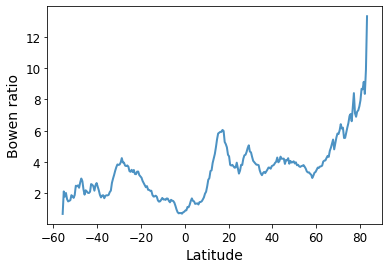

In [42]:
fig=plt.figure(figsize=(6, 4))

df_deal.BOWEN_RATIO[0,:].mean(dim=['pft','lon']).plot( alpha=0.8,linewidth = 2)
plt.ylabel('Bowen ratio',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(None)


plt.savefig("folder/图/4.纬向图.jpg",dpi=300)
plt.show()
